#**Project description**

###**Project goals**

**Testing changes:**

The introduction of a new interface for an improved recommendation system for
EU users.

**Test name:**

interface_eu_test

**Audience:**

The audience is new users from the EU who were encouraged to sign up in the
online store.
Expected number of test participants: 6000

**Test duration:**

From December 7 to December 21, 2020.

**Expected result:**

Increase total conversion by at least 10% at each stage of the funnel product_page → product_cart → purchase in test group B.


#**Data description**



*   ab_project_marketing_events_us.csv — the calendar of marketing events for 2020
*  final_ab_new_users_us.csv — all users who signed up in the online store from December 7 to 21, 2020
*  final_ab_events_us.csv — all events of the new users within the period from December 7, 2020 to January 1, 2021
*  final_ab_participants_us.csv — table containing test participants

# **Project Settings**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

###**Data sources**

In [2]:
Events = pd.read_csv("https://raw.githubusercontent.com/alona808/ab_testing_online_store/refs/heads/main/datasets/final_ab_events_us.csv")

In [3]:
Marketing_Events = pd.read_csv("https://raw.githubusercontent.com/alona808/ab_testing_online_store/refs/heads/main/datasets/ab_project_marketing_events_us.csv")

In [4]:
New_Users = pd.read_csv("https://raw.githubusercontent.com/alona808/ab_testing_online_store/refs/heads/main/datasets/final_ab_new_users_us.csv")

In [5]:
Participants = pd.read_csv("https://raw.githubusercontent.com/alona808/ab_testing_online_store/refs/heads/main/datasets/final_ab_participants_us.csv")

In [6]:
datasets = [('Events',Events), ('Marketing_Events',Marketing_Events), ('New_Users',New_Users), ('Participants',Participants)]

#**Data Overview and Preprocessing**

In [7]:
for name,dataset in datasets:
    print(f"Dataset_Name : {name}")
    print('    ')
    print(dataset.info())
    print('------------------------________----------------------------')

Dataset_Name : Events
    
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB
None
------------------------________----------------------------
Dataset_Name : Marketing_Events
    
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 580.0+ bytes
None
------------------------________----------------------------
Dataset_

In [8]:
for name,dataset in datasets:
    print(f"Dataset_Name : {name}")
    print('    ')
    print(dataset.head())
    print('------------------------________----------------------------')

Dataset_Name : Events
    
            user_id             event_dt event_name  details
0  E1BDDCE0DAFA2679  2020-12-07 20:22:03   purchase    99.99
1  7B6452F081F49504  2020-12-07 09:22:53   purchase     9.99
2  9CD9F34546DF254C  2020-12-07 12:59:29   purchase     4.99
3  96F27A054B191457  2020-12-07 04:02:40   purchase     4.99
4  1FD7660FDF94CA1F  2020-12-07 10:15:09   purchase     4.99
------------------------________----------------------------
Dataset_Name : Marketing_Events
    
                           name                   regions    start_dt  \
0      Christmas&New Year Promo             EU, N.America  2020-12-25   
1  St. Valentine's Day Giveaway  EU, CIS, APAC, N.America  2020-02-14   
2        St. Patric's Day Promo             EU, N.America  2020-03-17   
3                  Easter Promo  EU, CIS, APAC, N.America  2020-04-12   
4             4th of July Promo                 N.America  2020-07-04   

    finish_dt  
0  2021-01-03  
1  2020-02-16  
2  2020-03-19  
3  202

In [9]:
for name,dataset in datasets:
    print(f"Dataset_Name : {name}")
    print('    ')
    print(dataset.describe())
    print('------------------------________----------------------------')

Dataset_Name : Events
    
            details
count  60314.000000
mean      23.881219
std       72.228884
min        4.990000
25%        4.990000
50%        4.990000
75%        9.990000
max      499.990000
------------------------________----------------------------
Dataset_Name : Marketing_Events
    
                            name regions    start_dt   finish_dt
count                         14      14          14          14
unique                        14       6          14          14
top     Christmas&New Year Promo    APAC  2020-12-25  2021-01-03
freq                           1       4           1           1
------------------------________----------------------------
Dataset_Name : New_Users
    
                 user_id  first_date region   device
count              61733       61733  61733    61733
unique             61733          17      4        4
top     8F04273BB2860229  2020-12-21     EU  Android
freq                   1        6290  46270    27520
--------------

###**The Marketing Events Dataset**

In [10]:
Marketing_Events[['start_dt','finish_dt']]=Marketing_Events[['start_dt','finish_dt']].apply(pd.to_datetime)

Marketing_Events=Marketing_Events.sort_values(by='start_dt')

Marketing_Events['n_days']=(Marketing_Events['finish_dt']-Marketing_Events['start_dt']).dt.days

Marketing_Events

,name,regions,start_dt,finish_dt,n_days
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07,13
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16,2
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10,2
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19,2
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19,7
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03,2
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11,2
11,Dragon Boat Festival Giveaway,APAC,2020-06-25,2020-07-01,6
4,4th of July Promo,N.America,2020-07-04,2020-07-11,7
13,Chinese Moon Festival,APAC,2020-10-01,2020-10-07,6


In [11]:
Marketing_Events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 6 to 10
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
 4   n_days     14 non-null     int64         
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 672.0+ bytes


####Preliminary overview:



*   The df_calendar_events dataset contains 14 events over the year 2020.
* The longest event duration is 13 days and belongs to 'Chinese New Year Promo'.
* The shortest event is 1 day. This is 'Single's Day Gift Promo'.
* There are no marketing events in August and September.
* The 'CIS New Year Gift Lottery' event coincides with the 'Christmas&New Year Promo' event. They overlap from December 30 to January 3 inclusive.
* There is no null values.
* The 14 days of A / B testing from December 7 to 21 did not coincide with any marketing event.



#**Test_Participants_Dataset**

In [12]:
Participants[['group', 'ab_test']].nunique()

,0
group,2
ab_test,2


In [13]:
Participants[['group', 'ab_test']].apply(pd.unique)

,group,ab_test
0,A,recommender_system_test
1,B,interface_eu_test


In [14]:
Participants.duplicated ().sum()

np.int64(0)

Preliminary overview:



*   The Participants dataset contains 18,268 records
*   All users are divided into 2 test groups and 2 types of A / B tests.
*   There are no duplicates and Nan values.
*   However, there are noticeably fewer unique test participants (16,666) than entries. This means that we have users in the dataset who passed both tests, recommender_system_test and in interface_eu_test.

I think we need to delete users who participate in two tests because we don't know which version of the interface the participants in the second test saw.



In [15]:
users_2_tests = (
    Participants
    .groupby('user_id')['ab_test']
    .nunique()
    .loc[lambda x: x > 1]
    .reset_index(name='test_count'))

users_2_tests.shape

(1602, 2)

In [16]:
users_2_tests.head()

,user_id,test_count
0,001064FEAAB631A1,2
1,00341D8401F0F665,2
2,003B6786B4FF5B03,2
3,0082295A41A867B5,2
4,00E68F103C66C1F7,2


In [17]:
Participants[Participants['user_id']=='0082295A41A867B5']

,user_id,group,ab_test
4768,0082295A41A867B5,A,recommender_system_test
14161,0082295A41A867B5,B,interface_eu_test


As we can see, the dataset contains 1602 records of users who participate in both tests. Let's remove them.

In [18]:
Participants=Participants[~Participants['user_id'].isin(users_2_tests['user_id'])]

uid = users_2_tests['user_id'].iloc[0]
Participants[Participants['user_id'] == uid]

,user_id,group,ab_test


In [19]:
Participants.shape[0]

15064

The test_groups dataset has 2 types of A/B test:

recommender_system_test,
interface_eu_test.
For the purposes of our current project, we have to use data related to interface_eu_test test.

So let's split the dataset to get the necessary data and study it.

In [20]:
Participants_EU = Participants[Participants['ab_test']=="interface_eu_test"]
Participants_EU.shape[0]

9965

In [21]:
Participants_by_group = Participants_EU.groupby('group')['user_id'].nunique()
Participants_by_group

,user_id
group,
A,5012
B,4953


Now let's check if the dataset has users who are in both test groups A and B.

In [22]:
EU_2 = Participants_EU.groupby('user_id')['group'].nunique().loc[lambda x: x > 1].reset_index(name='group_count')
EU_2.shape[0]

0

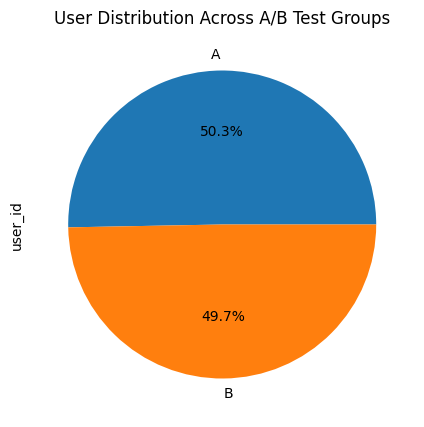

In [23]:
Participants_by_group.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),title='User Distribution Across A/B Test Groups')
plt.show()

Conclusion:



*   After preprocessing, we have a dataset named df_eu_test, which contains the users and groups of data we need, interface_eu_test A / B test.
*   The dataset df_eu_test has 9965 unique participants which are almost equally split: * 5012 users - in group A, * 4953 users - in group B
*   In our dataset we do not have users that got into both test types or into both test groups.



#**New_Users_Dataset**

In [24]:
New_Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


Count unique values in the columns:

In [25]:
New_Users.nunique()

,0
user_id,61733
first_date,17
region,4
device,4


In [26]:
New_Users[['region', 'device']].agg(pd.unique)

,region,device
0,EU,PC
1,N.America,Android
2,APAC,iPhone
3,CIS,Mac


In [27]:
New_Users.duplicated ().sum()

np.int64(0)

Preliminary overview:



*  The new_users dataset contains 61733 unique entries.
*  New users signed up in the online store from December 7 to 23, 2020.
*  New users have come from 4 regions: EU, N.America, APAC, CIS.
*  They utilize 4 types of devices: PC, Android, iPhone, Mac.
*  There are no duplicates and Nan values.

To test the new interface of the online store, we have 2 mandatory testing conditions:

* Testing lasted 14 days, from December 7 to December 21. So these days are included in the scope of the project;
* We have to research new EU users.

Firstly, let's look at the days of December 22nd and 23rd as outside the scope of our task and remove them.



In [28]:
New_Users= New_Users[New_Users['first_date']<"2020-12-22"]

In [29]:
New_Users['first_date'].max()

'2020-12-21'

Secondly, we have to extract data on new EU users from the dataset. Moreover, they must be our test participants.

In [30]:
New_Users_EU = New_Users[(New_Users['user_id'].isin (Participants_EU['user_id'])) & (New_Users['region']== "EU")]
New_Users_EU.shape[0]

8963

The dataset of new EU users who signed up in the online store from December 7 to 21, 2020 contains fewer unique users than the dataset containing test participants:

* dataset df_new_eu_users: 8963 users
* dataset  df_eu_test: 9965 users

I can assume that some users took part in A / B testing without prior registration in the online store, for example, using the 'Buy Now' button, etc. We can check this version later.

So let's continue with our new EU users.

first_date
2020-12-07     868
2020-12-08     515
2020-12-09     350
2020-12-10     464
2020-12-11     389
2020-12-12     694
2020-12-13     738
2020-12-14     886
2020-12-15     486
2020-12-16     324
2020-12-17     491
2020-12-18     530
2020-12-19     538
2020-12-20     689
2020-12-21    1001
Name: user_id, dtype: int64


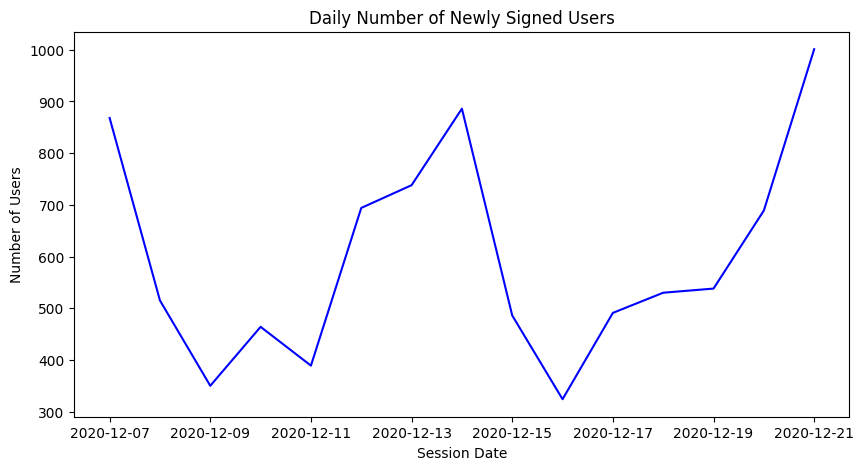

In [31]:
Daily_New_Users = (New_Users_EU.groupby('first_date')['user_id'].nunique())
print(Daily_New_Users)

Daily_New_Users.plot(kind='line',figsize=(10,5),title='Daily Number of Newly Signed Users',color='blue',xlabel='Session Date',ylabel='Number of Users')
plt.show()

* However, in fact, EU users make up 82% of our dataset.

device
Android    4022
Mac         930
PC         2281
iPhone     1730
Name: user_id, dtype: int64


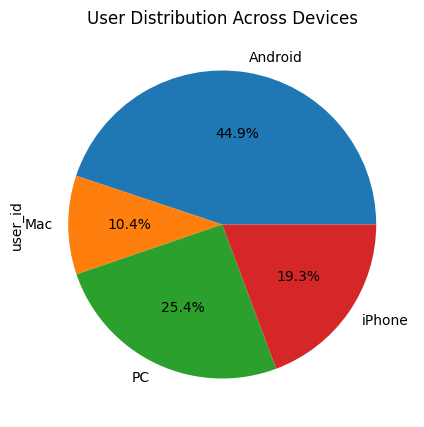

In [32]:
New_Users_by_Device = (New_Users_EU.groupby('device')['user_id'].nunique())
print(New_Users_by_Device)

New_Users_by_Device.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),title='User Distribution Across Devices')
plt.show()

Conclusion:

* After preprocessing we have the df_new_eu_users dataset 8963 unique entries.
* All new users in the dataset are from the EU who signed up in the online store from December 7 to 21, 2020.
* New EU user registrations for 14 days of testing varied greatly:
     * The maximum number of new users came on December 21st - 1001 new users,
     * The minimum - on December 16th - 324 new users,
     * The number of new user registrations depends on the day of week.
* They utilize 4 types of devices: PC, Android, iPhone, Mac:
     * Almost half of the new users are Android users, 44.9%.
     * The smallest number of users came using the Mac, 10.4%.
* There are no null values and duplicates in the dataset.
* **According to the assignment, the estimated number of test participants must be at least 6000. We have 8963 users, which meets the conditions of testing.**

#**Events dataset**

In [33]:
print(Events.shape)
Events.head()

(423761, 4)


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


Count unique values in the columns:

In [34]:
Events.nunique()

,0
user_id,58703
event_dt,257138
event_name,4
details,4


In [35]:
Events[['event_name','details']].agg(pd.unique)

,0
event_name,"[purchase, product_cart, product_page, login]"
details,"[99.99, 9.99, 4.99, 499.99, nan]"


Let's explore Nan values in the details column:

In [36]:
details_null = Events['details'].isna().sum()
details_null_pct = (Events['details'].isna().mean() * 100).round(2)

details_null, details_null_pct

(np.int64(363447), np.float64(85.77))

As we can see, our event dataset has 85.77% NaN values in the details column.

I think this happened because not all of our users did reach the purchase event. We can check this version)

In [37]:
Events[(Events['event_name']=='purchase') & (Events['details'].isna())].shape[0]

0

There is no 'purchase' event with NaN value in the 'details' column. But previous steps of funnel have Nan's.

I consider that we can fill Nan's with 0.

In [38]:
Events.details.fillna(0,inplace=True)
Events.isna().sum()

,0
user_id,0
event_dt,0
event_name,0
details,0


In [39]:
Events.duplicated ().sum()

np.int64(0)

In [40]:
Events
Events.event_dt.describe()

,event_dt
count,423761
unique,257138
top,2020-12-23 02:37:24
freq,10


In [41]:
Events['event_dt']=pd.to_datetime(Events['event_dt'])
Events=Events.sort_values(by='event_dt')
Events['event_dt'].describe()

,event_dt
count,423761
mean,2020-12-18 10:10:17.282395136
min,2020-12-07 00:00:33
25%,2020-12-14 03:05:18
50%,2020-12-18 17:40:52
75%,2020-12-22 13:51:17
max,2020-12-30 23:36:33


Preliminary overview:

* The events dataset contains 423761 records from December 7 to December 30, 2020.
* The funnel consists 4 events: login, product_page, product_cart, and purchase.
However, in accordance with our task, we are interested in a funnel of these 3 steps: product_page → product_card → purchase.
* There are no duplicates.
* Nan values of the variable details were filled with 0.

To prepare the dataset for further exploration, we need to perform the same data transformation as for the new user dataset, namely:

* First, get the data for our testing from December 7 to December 21;
* Second, we need to retrieve the events that were executed by our test participants.*

Let's create the df_test_events for our goals and explore it:

In [42]:
Events_EU = Events[(Events['user_id'].isin(Participants_EU['user_id'])) & (Events['event_dt'] < "2020-12-22")]
Events_EU.shape[0]

51848

Count unique values in the columns:

In [43]:
Events_EU.nunique()

,0
user_id,8959
event_dt,33338
event_name,4
details,5


In [44]:
print (Events_EU.sample(5))

print('   ')

print (Events_EU.event_name.value_counts())

print('   ')

Events_EU.duplicated ().sum()

                 user_id            event_dt    event_name  details
196620  CE8B1BCBCA042768 2020-12-20 19:52:29  product_page      0.0
339043  233653C0930FD807 2020-12-19 17:02:47         login      0.0
265953  80BE72C98A257C69 2020-12-11 10:20:44         login      0.0
285678  7B125EC357070D0E 2020-12-14 16:52:24         login      0.0
293795  8155910F11B56B21 2020-12-14 10:27:23         login      0.0
   
event_name
login           22132
product_page    14617
purchase         7657
product_cart     7442
Name: count, dtype: int64
   


np.int64(0)

First look at the number of events per user:

In [45]:
Events_EU_per_user = Events_EU.groupby('user_id')['event_dt'].count()
Events_EU_per_user.describe()

,event_dt
count,8959.000000
mean,5.787253
std,3.727047
min,1.000000
25%,3.000000
50%,6.000000
75%,8.000000
max,24.000000


In [46]:
Events_EU_per_user.mode()

,event_dt
0,6


Conclusion

* The df_test_events dataset contains 51848 events.
* The dataset includes data that was collected from December 7 to December 21, 2020.
* All events presented in the dataset were performed by test takers.
* Each participant completed at least 1 event. Maximum events performed by user is 24.
* An average number of events per user is 6.
* Most often the number of events per user is 6, which coincides with the average number of events.

#**Merging Datasets**

After preprocessing our datasets, we can combine them for deeper exploratory analysis.
But first, a small reminder of which ones we will use and what they look like :)

In [47]:
Participants_EU.head()

,user_id,group,ab_test
6701,D4E530F6595A05A3,A,interface_eu_test
6703,6BCB0F33D3BAB8C2,A,interface_eu_test
6707,2D2E7AA539CF348F,B,interface_eu_test
6708,4BA448BCE1343C6F,A,interface_eu_test
6709,76B6CDF2A8B1DBFC,B,interface_eu_test


In [48]:
New_Users_EU.head()

,user_id,first_date,region,device
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
14,5BE017E9C8CC42F8,2020-12-07,EU,Android
18,96F27A054B191457,2020-12-07,EU,iPhone
21,E6AF85675078215D,2020-12-07,EU,Android


In [49]:
Events_EU.head()

,user_id,event_dt,event_name,details
245271,B13A53A1EB2038EE,2020-12-07 00:02:48,login,0.0
245598,4C4BA430AAA820F8,2020-12-07 00:03:18,login,0.0
123266,4C4BA430AAA820F8,2020-12-07 00:03:19,product_page,0.0
242531,4B7C59A60FE1DA69,2020-12-07 00:03:51,login,0.0
60719,4B7C59A60FE1DA69,2020-12-07 00:03:54,product_cart,0.0


In [50]:
print('Participants_EU :', Participants_EU.shape[0],'  New_users_EU :', New_Users_EU.shape[0],'  Events_EU :',Events_EU.shape[0])

Participants_EU : 9965   New_users_EU : 8963   Events_EU : 51848


Combining the datasets:

In [51]:
df_ab_testing = Events_EU.merge(Participants_EU[['user_id','group']],on='user_id',how='left').merge(New_Users_EU[['user_id', 'first_date', 'device']],on='user_id',how='left')
df_ab_testing.head()

,user_id,event_dt,event_name,details,group,first_date,device
0,B13A53A1EB2038EE,2020-12-07 00:02:48,login,0.0,A,2020-12-07,PC
1,4C4BA430AAA820F8,2020-12-07 00:03:18,login,0.0,A,2020-12-07,PC
2,4C4BA430AAA820F8,2020-12-07 00:03:19,product_page,0.0,A,2020-12-07,PC
3,4B7C59A60FE1DA69,2020-12-07 00:03:51,login,0.0,B,2020-12-07,Android
4,4B7C59A60FE1DA69,2020-12-07 00:03:54,product_cart,0.0,B,2020-12-07,Android


In [52]:
df_ab_testing.isnull().sum()

,0
user_id,0
event_dt,0
event_name,0
details,0
group,0
first_date,0
device,0


In [53]:
df_ab_testing.duplicated().sum()

np.int64(0)

#**Exploratory Data Analysis (EDA)**

##**Study conversion at different funnel stages.**

The main goal of our test is to make sure that the total conversion [1] on each stage in Test Group B is better than the total conversion at the same stage in Control Group A.

[1] 'Total conversion is the ratio of users at a particular stage to the number of users at the first stage.'

Let's plot the funnel and compare the groups.

1) Calculate the number of users for each stage in group A:
2) Calculating total conversion for each funnel stage in group A:

In [54]:
funnel_order=['login','product_page','product_cart','purchase']

df_funnel_A = (
    df_ab_testing[df_ab_testing['group'] == 'A']
    .groupby('event_name')['user_id']
    .count()
    .reset_index(name='n_users')
)

# enforce logical order
df_funnel_A['event_name'] = pd.Categorical(
    df_funnel_A['event_name'],
    categories=funnel_order,
    ordered=True)

df_funnel_A = df_funnel_A.sort_values('event_name')

first_stage_A = df_funnel_A['n_users'].iloc[0]
print(f'First Stage Users : {first_stage_A}')

print('       ')

df_funnel_A['conversion_pct'] = (df_funnel_A['n_users'] / first_stage_A * 100).round(2)
df_funnel_A['test_group'] = 'A'
print(df_funnel_A)



First Stage Users : 11247
       
     event_name  n_users  conversion_pct test_group
0         login    11247          100.00          A
2  product_page     7515           66.82          A
1  product_cart     3720           33.08          A
3      purchase     4031           35.84          A


The same steps for the group B:

In [55]:
df_funnel_B = (
    df_ab_testing[df_ab_testing['group'] == 'B']
    .groupby('event_name')['user_id']
    .count()
    .reset_index(name='n_users'))

df_funnel_B['event_name'] = pd.Categorical(
    df_funnel_B['event_name'],
    categories=funnel_order,
    ordered=True)

df_funnel_B = df_funnel_B.sort_values('event_name')

first_stage_B = df_funnel_B['n_users'].iloc[0]
print(f'First Stage Users : {first_stage_B}')

print('        ')

df_funnel_B['conversion_pct'] = (df_funnel_B['n_users'] / first_stage_B * 100).round(2)
df_funnel_B['test_group'] = 'B'
print(df_funnel_B)

First Stage Users : 10885
        
     event_name  n_users  conversion_pct test_group
0         login    10885          100.00          B
2  product_page     7102           65.25          B
1  product_cart     3722           34.19          B
3      purchase     3626           33.31          B


Concatenating test groups and plotting funnel chart:

In [56]:
df_funnel = pd.concat([df_funnel_A, df_funnel_B], axis=0)
print(df_funnel)

print('      ')

import plotly.express as px

Funnel = px.funnel(df_funnel, x='conversion_pct',y='event_name',color='test_group',title='Funnel Analysis- Control Group A  vs  Test Group B')
Funnel.show()

     event_name  n_users  conversion_pct test_group
0         login    11247          100.00          A
2  product_page     7515           66.82          A
1  product_cart     3720           33.08          A
3      purchase     4031           35.84          A
0         login    10885          100.00          B
2  product_page     7102           65.25          B
1  product_cart     3722           34.19          B
3      purchase     3626           33.31          B
      


* According to the test, it was expected that 'At each stage of the funnel product_page → product_cart → purchase, there will be at least a 10% increase."
* However, the funnel chart shows that the conversion in the control group A is even slightly higher than in the test group B in the first two stages.
* Only the Product_Cart stage showed 1.11% better in test group B than in group A.
* Moreover, at purchase stage in group A, the total conversion is higher than at the previous stage. I assume this was due to the 'Buy Now' button, which allowed users to buy by skipping some steps.

**Is the number of events per user distributed equally in the samples?**

  group  n_users  n_events  events_per_user
0     A     4521     26513             5.86
1     B     4438     25335             5.71


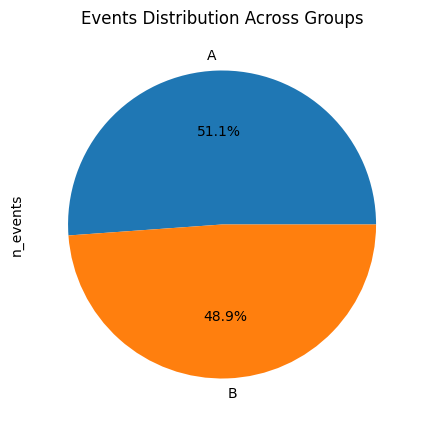

In [57]:
summary = df_ab_testing.groupby('group').agg(
    n_users=('user_id', 'nunique'),
    n_events=('event_dt', 'count')
).reset_index()

summary['events_per_user'] = (summary['n_events'] / summary['n_users']).round(2)

print(summary)


summary['n_events'].plot(kind='pie',labels=summary['group'],autopct='%1.1f%%',figsize=(5,5),title='Events Distribution Across Groups')
plt.show()

As we can see, the share of users and events is close to 50/50.

Thus, we can claim that the number of events per user distributed equally in the samples

**Are there users who enter both samples?**

In [58]:
users_in_multiple_groups = (
    df_ab_testing
    .groupby('user_id')['group']
    .nunique()
)

users_in_multiple_groups[users_in_multiple_groups > 1].shape[0]


0

There is no users who enter both samples.

**How is the number of events distributed by days?**

In [59]:
df_ab_testing['event_date']=df_ab_testing['event_dt'].dt.date
df_ab_testing.head()

,user_id,event_dt,event_name,details,group,first_date,device,event_date
0,B13A53A1EB2038EE,2020-12-07 00:02:48,login,0.0,A,2020-12-07,PC,2020-12-07
1,4C4BA430AAA820F8,2020-12-07 00:03:18,login,0.0,A,2020-12-07,PC,2020-12-07
2,4C4BA430AAA820F8,2020-12-07 00:03:19,product_page,0.0,A,2020-12-07,PC,2020-12-07
3,4B7C59A60FE1DA69,2020-12-07 00:03:51,login,0.0,B,2020-12-07,Android,2020-12-07
4,4B7C59A60FE1DA69,2020-12-07 00:03:54,product_cart,0.0,B,2020-12-07,Android,2020-12-07


Number of total daily events:

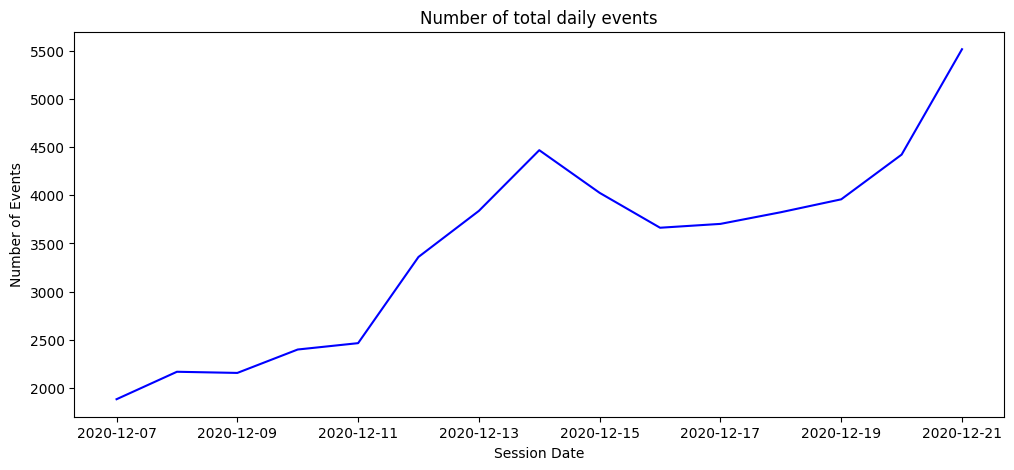

In [60]:
Events_per_day = df_ab_testing.groupby('event_date')['user_id'].count()

Events_per_day.plot(kind='line',figsize=(12,5),title='Number of total daily events',color='blue',xlabel='Session Date',ylabel='Number of Events')
plt.show()

Number of total daily events per test groups:

   event_date group  n_events
0  2020-12-07     A       955
1  2020-12-07     B       928
2  2020-12-08     A      1070
3  2020-12-08     B      1098
4  2020-12-09     A      1084


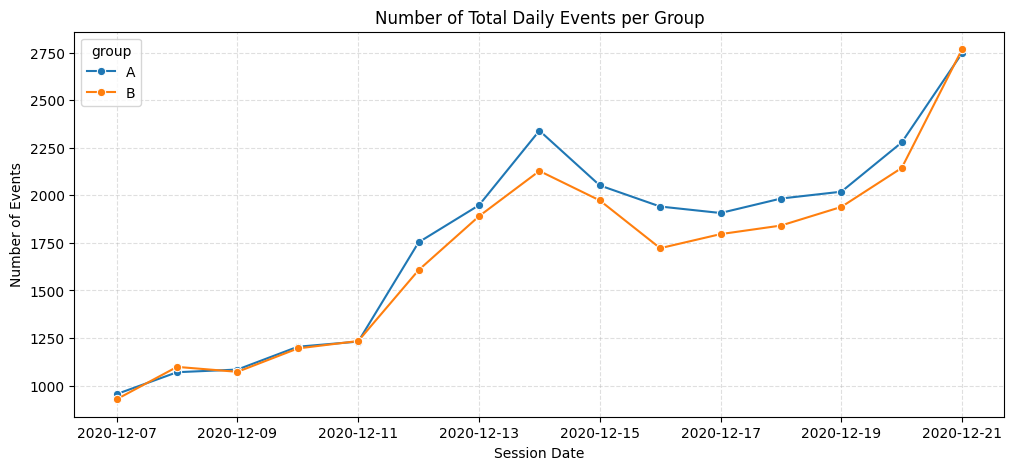

In [61]:
Events_per_group = df_ab_testing.groupby(['event_date','group'])['event_dt'].count().reset_index(name = 'n_events')
print(Events_per_group.head())

plt.figure(figsize=(12,5))
sns.lineplot(data=Events_per_group,x='event_date',y='n_events',hue='group',marker='o')
plt.title('Number of Total Daily Events per Group')
plt.xlabel('Session Date')
plt.ylabel('Number of Events')

sns.set_style("ticks")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()



Number of total daily events by event name:

   event_date    event_name  n_events
0  2020-12-07         login       817
1  2020-12-07  product_cart       250
2  2020-12-07  product_page       535
3  2020-12-07      purchase       281
4  2020-12-08         login       926


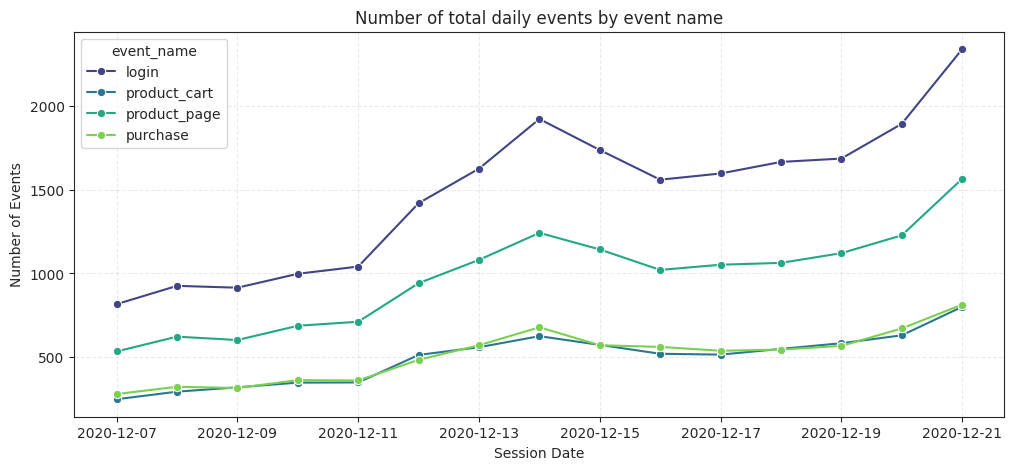

In [62]:
Events_by_eventname = df_ab_testing.groupby(['event_date','event_name'])['event_dt'].count().reset_index(name = 'n_events')
print(Events_by_eventname.head())

plt.figure(figsize=(12,5))
sns.lineplot(data=Events_by_eventname,x='event_date',y='n_events',hue='event_name',marker='o',palette='viridis')
plt.title('Number of total daily events by event name')
plt.xlabel('Session Date')
plt.ylabel('Number of Events')

sns.set_style("ticks")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

Number of total daily events by device:

   event_date   device  n_events
0  2020-12-07  Android       808
1  2020-12-07      Mac       237
2  2020-12-07       PC       480
3  2020-12-07   iPhone       358
4  2020-12-08  Android       979


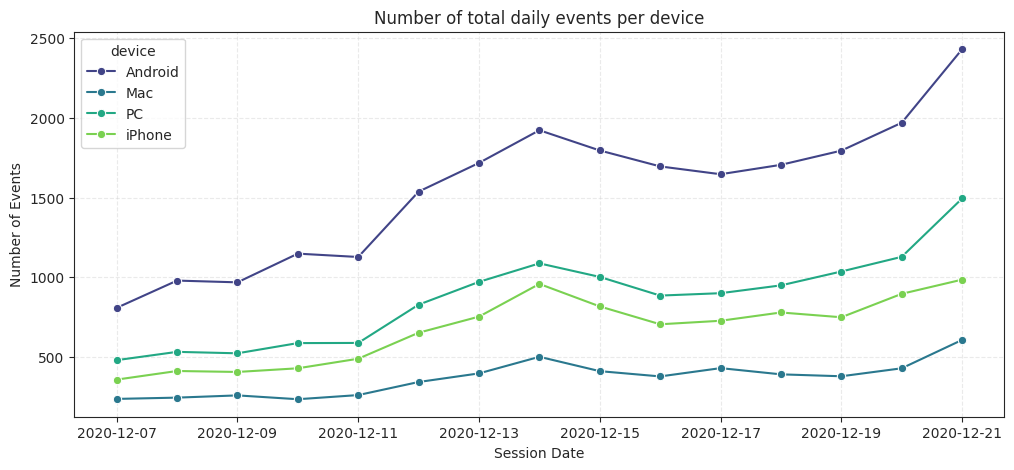

In [63]:
Events_by_device = df_ab_testing.groupby(['event_date','device'])['event_dt'].count().reset_index(name = 'n_events')
print(Events_by_device.head())

plt.figure(figsize=(12,5))
sns.lineplot(data=Events_by_device,x='event_date',y='n_events',hue='device',marker='o',palette='viridis')
plt.title('Number of total daily events per device')
plt.xlabel('Session Date')
plt.ylabel('Number of Events')

sns.set_style("ticks")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

* The total number of events during the test increased significantly, 3 times.
* This feature is typical for both Groups A and B, for each event name and for number of events per device.
* Most of the events were performed by Android users, with the smallest user group being Mac fans.
* It is clear from the graphs that we can say that there were spikes of events on a certain weekday. In our case, it was on Thursdays.
* To funnel stages, product_cart and purchase have almost the same number of events during the test weeks. I can assume that the abandoned cart percentage is very low, or the 'Buy Now' button works better than the whole funnel.

**Think of the possible details in the data that you have to take into account before starting the A/B test?**

* The datasets had users who were assigned to multiple groups and who performed both tests at the same time. We have processed our data to avoid exposure to these factors.
* We also checked if the users are equally split.
* But there is an external factor that influences the test result. I consider that we have to take into account that the A / B test was carried out on the eve of Christmas.
And even if the specific testing time did not last at the same time as the marketing activities, we cannot trust the results 100% due to the well-known increase in consumer activity before the Christmas holidays.

**Conclusion:**

* The test group B did not achieve expected result of increasing total conversion at least 10% on each stage of the funnel product_page → product_cart → purchase.
* The test group B showed better result on the purchase stage.
* There is no users who enter both samples.
* The number of events per user distributed equally in the samples.

#**Evaluate the A/B test results**

**What can you tell about the A/A test results?**

In [64]:
df_users_pivot = df_ab_testing.pivot_table(index='event_name',columns='group',values='user_id',aggfunc='nunique').reset_index()
df_users_pivot

group,event_name,A,B
0,login,4520,4438
1,product_cart,1479,1516
2,product_page,3030,2913
3,purchase,1612,1479


In [65]:
df_users_pivot['diff_n_users'] = df_users_pivot['A'] - df_users_pivot['B']
df_users_pivot

group,event_name,A,B,diff_n_users
0,login,4520,4438,82
1,product_cart,1479,1516,-37
2,product_page,3030,2913,117
3,purchase,1612,1479,133


In [66]:
df_users_crosstab = pd.crosstab(index= df_ab_testing['event_name'], columns=df_ab_testing['group'],values=df_ab_testing['user_id'],
                                aggfunc='nunique',normalize=True,margins=True,margins_name='Total').reset_index()

df_users_crosstab

group,event_name,A,B,Total
0,login,0.215371,0.211464,0.426836
1,product_cart,0.070472,0.072235,0.142707
2,product_page,0.144375,0.138800,0.283175
3,purchase,0.076809,0.070472,0.147282
4,Total,0.504632,0.495368,1.000000


In [67]:
df_users_crosstab['diff_share_stage']=((df_users_crosstab['A']-df_users_crosstab['B'])*100).round(2)
df_users_crosstab

group,event_name,A,B,Total,diff_share_stage
0,login,0.215371,0.211464,0.426836,0.39
1,product_cart,0.070472,0.072235,0.142707,-0.18
2,product_page,0.144375,0.138800,0.283175,0.56
3,purchase,0.076809,0.070472,0.147282,0.63
4,Total,0.504632,0.495368,1.000000,0.93


We can argue that all the criteria we have for a successful A/A test:

* As can be seen from the aggregated tables, there is no significant difference between the samples. On Each stage the difference is less then 1%.
* For all groups, data on the same event is recorded.
* Users remain within their groups until the end of the test.
* Users who may see different versions of the page during the test were removed from the groups.

#**Use the z-criterion to check the statistical difference between the proportions**

**H0: there is not a statistically significant difference in conversion between the samples A and B**

**H1: there is a statistically significant difference in conversion between the samples A and B**

In [68]:
event = df_users_pivot['event_name'].unique()   ## Preparing event data

alpha = 0.05

results=[]
from statsmodels.stats.proportion import proportions_ztest

In [69]:
for eve in event:         ## Loop for all event Z-test
  a_sucess = df_users_pivot.loc[df_users_pivot['event_name']==eve,'A'].iloc[0]
  b_sucess = df_users_pivot.loc[df_users_pivot['event_name']==eve,'B'].iloc[0]

  a_total=df_ab_testing[df_ab_testing['group']=='A']['user_id'].nunique()
  b_total=df_ab_testing[df_ab_testing['group']=='B']['user_id'].nunique()

  z_stat,p_value=proportions_ztest(count=[a_sucess,b_sucess],nobs=[a_total,b_total])

  results.append({'event_name':eve,'p_value':round(p_value,6),'significant':p_value <alpha,'decision': 'Reject H₀' if p_value < alpha else 'Fail to Reject H₀'})


In [70]:
ab_test_results = pd.DataFrame(results)
ab_test_results

,event_name,p_value,significant,decision
0,login,0.321767,False,Fail to Reject H₀
1,product_cart,0.147028,False,Fail to Reject H₀
2,product_page,0.166090,False,Fail to Reject H₀
3,purchase,0.020365,True,Reject H₀


###**Conclusion:**

* As a result of checking the hypothesis, we cannot reject H0 for all the events.
* Thus, we can accept the equality of the proportions of the population of A and B groups. It means that the groups were split properly.

#**General conclusion**

**Datasets**:

* The logs were collected in several tables for the period from December 7 to December 30, 2020.
* The two types of tests were run simultaneously and overlapped using the same test participants.

**New interface for EU users test:**

* The test was carried out within 14 days, from December 7 to December 21, 2020.
* After preprocessing, we got a dataset that contains 51848 different events performed by 8959 unique users.
* Users are split equally into two groups: - A control group - 4521 users - B test group - 4438 users
* Control group A gets the old site version and one test group B gets the new ones:

**The funnel:**

* Consists of 4 events: login -> product_page -> product_cart -> purchase
* The number of events per user distributed equally in the samples.

**Performing tests:**

* The A/A test shows that the control groups were split properly.
* A / B tests show that we cannot reject null hypotheses. In other words, there are no statistically significant differences in conversions between two groups across all 4 events.

**External factors:**

* The A / B test was carried out on the eve of Christmas during the period of increased buying activity before the Christmas holidays. Thus, we cannot trust the results 100%.

**Test result:**

* The test group B did not achieve the expected result of increasing total conversion at least 10% on each stage of the funnel product_page → product_cart → purchase.
* Moreover, total conversion in group B is almost the same or less than total conversion in group A on stages product_page -> product_cart.
* Only at the last stage,purchase, test group B showed a 1.11% better result than in group A and than at the product_cart stage in their group.
It means that some EU users made purchasing in one-click using the 'Buy Now' button.

**Recommendation:**

* It can be assumed that EU users prefer to shop in the shortest and fastest way, skipping stages in the usual sales funnel order. This hypothesis should be tested.